In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "userbehaviour.csv"
data = pd.read_csv(file_path)
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [3]:
data.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [5]:
data.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


# Screen Time Analysis

In [7]:
highest_screen_time = data['Average Screen Time'].max()
lowest_screen_time = data['Average Screen Time'].min()
average_screen_time = data['Average Screen Time'].mean()
print(highest_screen_time, lowest_screen_time, average_screen_time)

50.0 0.0 24.39039039039039


# Spending Analysis

In [8]:
highest_spent = data['Average Spent on App (INR)'].max()
lowest_spent = data['Average Spent on App (INR)'].min()
average_spent = data['Average Spent on App (INR)'].mean()
print(highest_spent, lowest_spent, average_spent)

998.0 0.0 424.4154154154154


# Relationship Between Spending and Screen Time

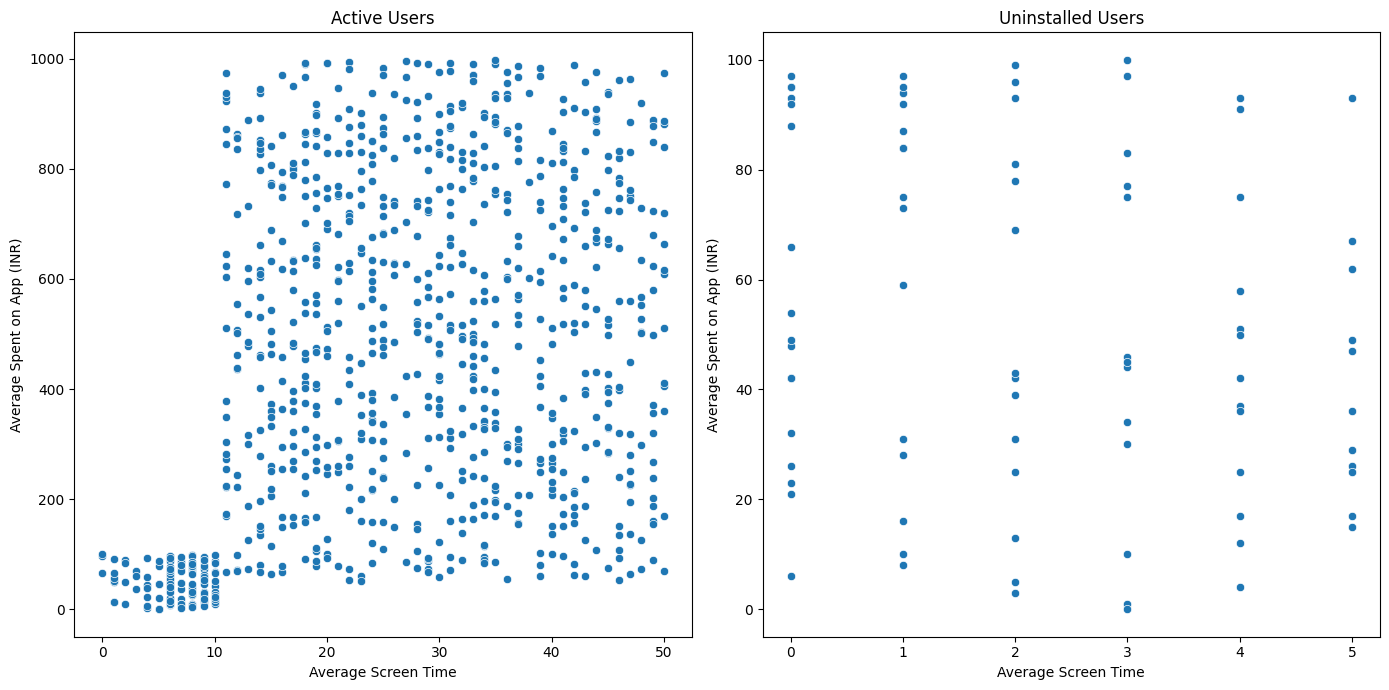

In [15]:
active_users = data[data['Status'] == 'Installed']
uninstalled_users = data[data['Status'] == 'Uninstalled']

plt.figure(figsize=(14, 7))

# Active users
plt.subplot(1, 2, 1)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=active_users)
plt.title('Active Users')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')

# Uninstalled users
plt.subplot(1, 2, 2)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=uninstalled_users)
plt.title('Uninstalled Users')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')

plt.tight_layout()
plt.show()

# Observations

# Relationship Between Ratings and Screen Time

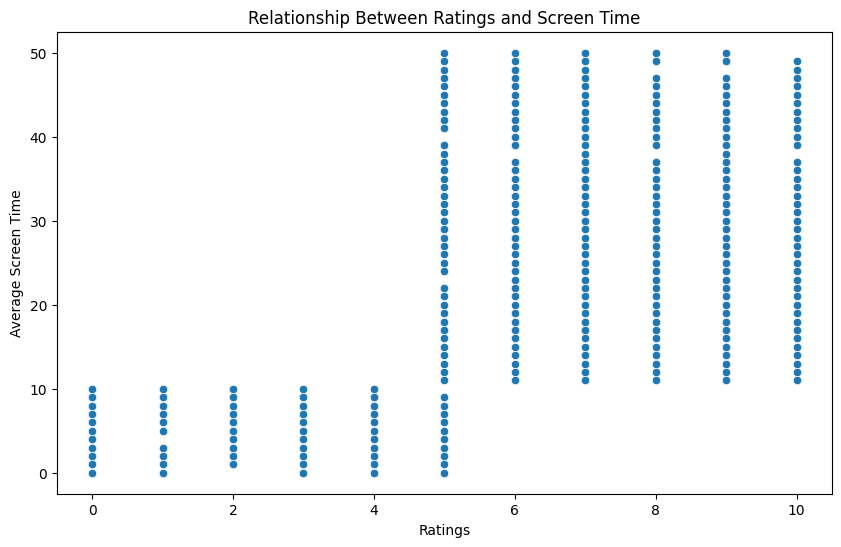

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Average Screen Time', data=data)
plt.title('Relationship Between Ratings and Screen Time')
plt.xlabel('Ratings')
plt.ylabel('Average Screen Time')
plt.show()

# Observation

# App User Segmentation using K-means Clustering

In [19]:
# Selecting features for clustering
features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [25]:
# Using the optimal number of clusters (e.g., 3 from the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)

# Number of segments
num_segments = data['Segment'].nunique()
num_segments

3

# Visualize the segments

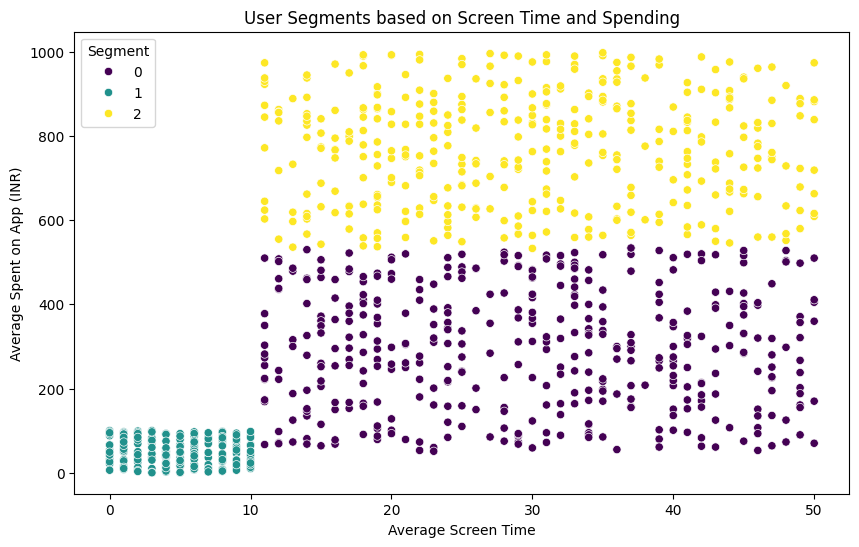

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Segment', palette='viridis', data=data)
plt.title('User Segments based on Screen Time and Spending')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.show()

# Corelation Analysis

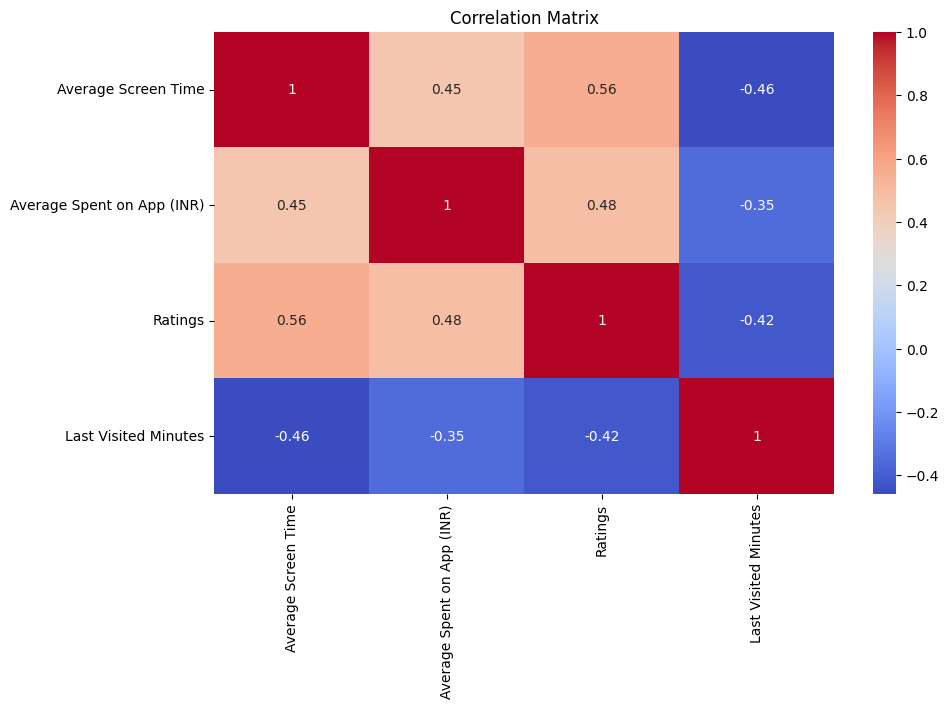

,Average Screen Time,Average Spent on App (INR),Ratings,Last Visited Minutes
Average Screen Time,1.000000,0.445920,0.557624,-0.458216
Average Spent on App (INR),0.445920,1.000000,0.482451,-0.350524
Ratings,0.557624,0.482451,1.000000,-0.416936
Last Visited Minutes,-0.458216,-0.350524,-0.416936,1.000000


In [28]:
correlation_matrix = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix # Observations

# Anomaly Detection using Isolation Forest

In [29]:
anomaly_features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']]

iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(anomaly_features)

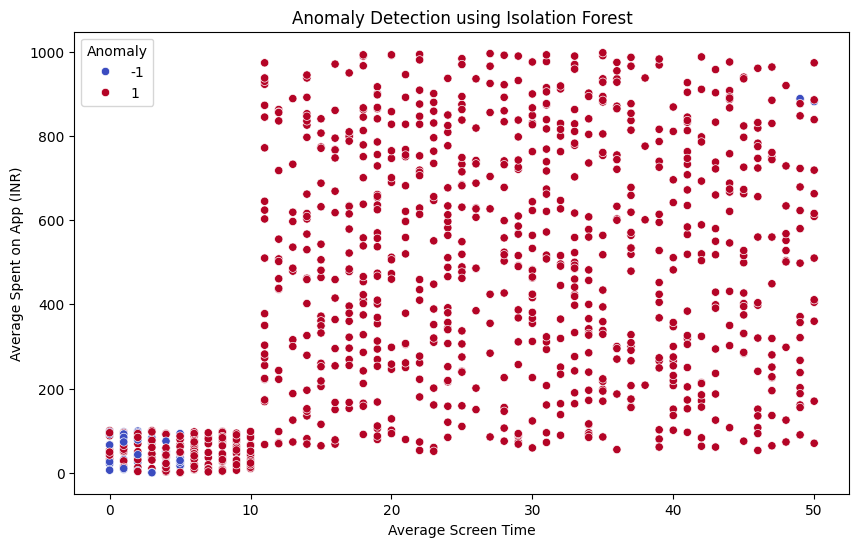

In [30]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Anomaly', palette='coolwarm', data=data)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.show()

In [31]:
num_anomalies = data[data['Anomaly'] == -1].shape[0]
num_anomalies

50